In [1]:
import pandas as pd
import numpy as np


In [2]:
x = np.array(31)

In [3]:
x

array(31)

In [4]:
x.ndim

0

In [5]:
x = np.array([1 ,2, 3, 4])

In [6]:
x

array([1, 2, 3, 4])

In [7]:
x.ndim

1

In [8]:
x = np.array([[1,2,3],[4, 5, 6]])

In [9]:
x

array([[1, 2, 3],
       [4, 5, 6]])

In [10]:
x = np.array([[[1, 2],[3, 4]],[[10, 20],[30, 40]]])

In [11]:
x

array([[[ 1,  2],
        [ 3,  4]],

       [[10, 20],
        [30, 40]]])

In [12]:
x.ndim

3

In [13]:
x.shape

(2, 2, 2)

In [14]:
import tensorflow as tf

In [15]:
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [16]:
x = tf.ones(shape = (2, 2))

In [17]:
x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>

In [18]:
x = tf.zeros(shape = (3, 3, 3))
x

<tf.Tensor: shape=(3, 3, 3), dtype=float32, numpy=
array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)>

In [19]:
tf.random.normal(shape = (2, 2), mean = 0, stddev = 1)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-0.24215072,  1.2173078 ],
       [ 0.756656  , -0.05164996]], dtype=float32)>

In [20]:
x = tf.random.uniform(shape = (3, 3), minval=0, maxval=10)
x

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[7.6786757, 2.0977008, 6.7045507],
       [6.4285984, 2.220291 , 9.501573 ],
       [6.1533856, 3.8389182, 9.541364 ]], dtype=float32)>

In [21]:
v = tf.Variable(initial_value= tf.random.normal(shape = (2, 2), mean=0, stddev= 1))
v

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-0.47847572, -2.0529993 ],
       [ 0.85075307,  0.79808325]], dtype=float32)>

In [22]:
v.assign(tf.ones(shape = (2,2)))

<tf.Variable 'UnreadVariable' shape=(2, 2) dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>

In [23]:
v.assign_add(tf.ones(shape = (2,2)))

<tf.Variable 'UnreadVariable' shape=(2, 2) dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

In [24]:
tf.square(v)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[4., 4.],
       [4., 4.]], dtype=float32)>

In [25]:
tf.sqrt(v)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1.4142135, 1.4142135],
       [1.4142135, 1.4142135]], dtype=float32)>

In [26]:
from tensorflow.keras.datasets import mnist

In [27]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [28]:
train_images.ndim

3

In [29]:
train_images.shape

(60000, 28, 28)

In [30]:
test_images.shape

(10000, 28, 28)

In [31]:
test_labels.shape

(10000,)

In [32]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

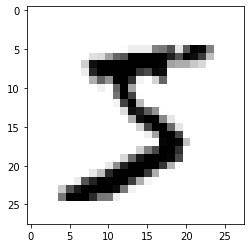

In [33]:
import matplotlib.pyplot as plt
digit = train_images[0]
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

In [34]:
train_labels[0]

5

In [35]:
val_images = train_images[100:200]
val_images.shape

(100, 28, 28)

In [36]:
images1 = train_images[100:110, 14:, 14:]
images1.shape

(10, 14, 14)

In [37]:
images1 = train_images[100:110, 7: -7, 7:-7]
images1.shape

(10, 14, 14)

In [38]:
my_batch = train_images[0:20]
my_batch.shape

(20, 28, 28)

In [39]:
train_images = train_images.reshape((60000, 28*28))

In [40]:
train_images.shape

(60000, 784)

In [41]:
test_images = test_images.reshape((10000, 28*28))

In [42]:
test_images.shape

(10000, 784)

In [43]:
train_images = train_images.astype("float32") / 255

In [44]:
test_images = test_images.astype("float32") / 255

In [45]:
from tensorflow import keras
from keras import layers
model = keras.Sequential([
    layers.Dense(512, activation = "relu"),
    layers.Dense(10, activation = "softmax")
])

In [46]:
model.compile(optimizer = "rmsprop",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

In [47]:
model.fit(train_images, train_labels, epochs = 5, batch_size= 128)

Epoch 1/5
469/469 [==============================] - 7s 5ms/step - loss: 0.2608 - accuracy: 0.9241
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1052 - accuracy: 0.9693
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0695 - accuracy: 0.9791
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0506 - accuracy: 0.9847
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0370 - accuracy: 0.9887


In [48]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
test_labels[0]

7

In [49]:
predictions[0]

array([4.5671968e-09, 3.5702841e-10, 1.3267701e-06, 3.0313171e-05,
       2.4841470e-12, 2.3900796e-08, 4.4359458e-15, 9.9996805e-01,
       7.2942441e-08, 3.2544085e-07], dtype=float32)

In [51]:
predictions[0].argmax()

7